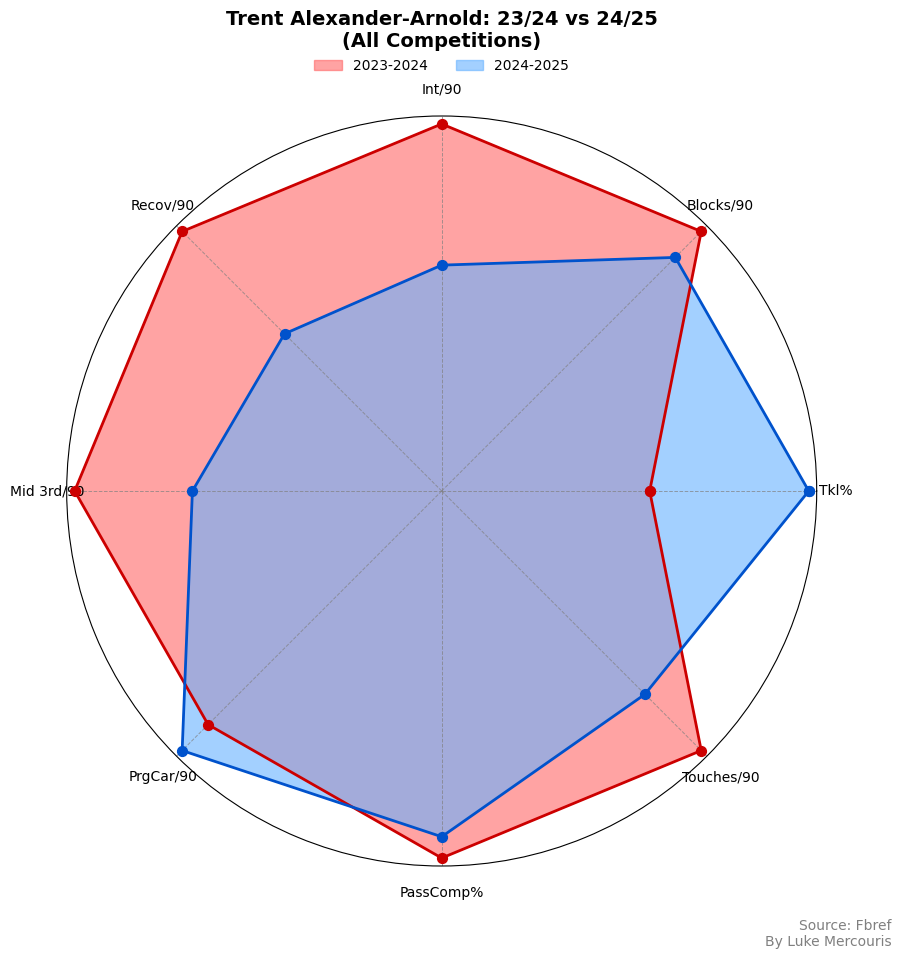

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input the data - I did this manually as there are few data points
stats = ['Tkl%', 'Blocks/90', 'Int/90', 'Recov/90', 'Mid 3rd/90', 'PrgCar/90', 'PassComp%', 'Touches/90']
data_2023 = [34.0, 1.0, 1.3, 7.1, 48.0, 1.8, 75.8, 91.3]  # Data for 2023-2024
data_2024 = [60.0, 0.9, 0.8, 4.3, 32.6, 2.0, 71.4, 71.5]  # Data for 2024-2025

# Since I was dealing with per 90 figures and percentages I needed to scale them to a max of 100 for chart purposes
scaled_2023 = [(val / max(data_2023[idx], data_2024[idx])) * 100 for idx, val in enumerate(data_2023)]
scaled_2024 = [(val / max(data_2023[idx], data_2024[idx])) * 100 for idx, val in enumerate(data_2024)]

num_vars = len(stats)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

scaled_2023 += scaled_2023[:1]
scaled_2024 += scaled_2024[:1]

# The creation of the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plotted the data points, chose a colour, and decided to add points to depict the markers of each statistical point
ax.fill(angles, scaled_2023, color='#FF6666', alpha=0.6, label='2023-2024')
ax.plot(angles, scaled_2023, color='#CC0000', linewidth=2)

ax.scatter(angles, scaled_2023, color='#CC0000', s=50, zorder=5) 

# Same process as above, but now for the other season and with a different colour for distinction 
ax.fill(angles, scaled_2024, color='#66B2FF', alpha=0.6, label='2024-2025')
ax.plot(angles, scaled_2024, color='#0052CC', linewidth=2)


ax.scatter(angles, scaled_2024, color='#0052CC', s=50, zorder=5)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats, fontsize=10, color='black')  # Retrospectively I decided to change the stat labels to a smaller font - done here
ax.set_yticks([])

ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.7)  # The initial gridlines weren't clear enough so I just enchanced their colouring 

# This is just a standard procedure I do for radard charts to make sure the stats are not covered
for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
    label.set_horizontalalignment('center')
    if angle == 0 or angle == np.pi:
        label.set_verticalalignment('center')
    elif angle < np.pi:
        label.set_verticalalignment('bottom')
    else:
        label.set_verticalalignment('top')

# Title
ax.set_title('Trent Alexander-Arnold: 23/24 vs 24/25\n(All Competitions)', 
             fontsize=14, fontweight='bold', pad=50, color='black')  # The padding I incorporated here was just to put more space between the title and chart

# Presentation purposes - I moved the legend below the title but above the chart
legend = fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.92), fontsize=10, ncol=2, frameon=False)

# Added my tag and the source of the data below
fig.text(0.95, 0.02, "Source: Fbref\nBy Luke Mercouris", fontsize=10, color='gray', ha='right')

# Presentation purposes - I tried to center the chart in image
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)

# Plotted my chart
plt.show()


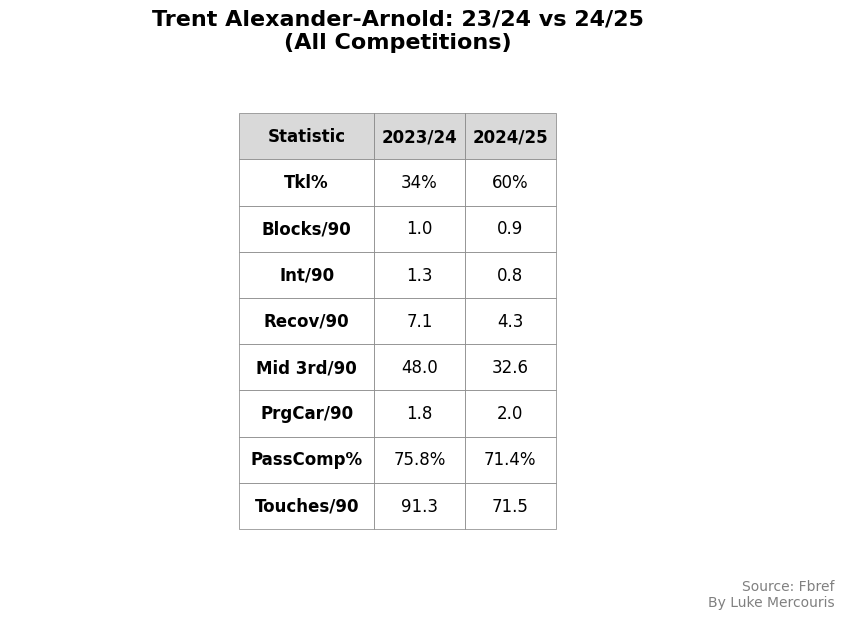

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from above
stats = ['Tkl%', 'Blocks/90', 'Int/90', 'Recov/90', 'Mid 3rd/90', 'PrgCar/90', 'PassComp%', 'Touches/90']
data_2023 = ['34%', 1.0, 1.3, 7.1, 48.0, 1.8, '75.8%', 91.3]  
data_2024 = ['60%', 0.9, 0.8, 4.3, 32.6, 2.0, '71.4%', 71.5]  

# Created a DataFrame
data = {
    'Statistic': stats,
    '2023/24': data_2023,
    '2024/25': data_2024
}
df = pd.DataFrame(data)


fig, ax = plt.subplots(figsize=(10, 6))  # Initially the sizing wasn't clear, so I adjusted figure size for a larger table

ax.axis('off')
ax.axis('tight')

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    colColours=['#d9d9d9', '#f0f0f0', '#f0f0f0'],
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(df.columns))))  # The data was displayed in a 'tight' manner, so this was to adjust column width

# Presentation purposes - font, bold, etc.
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#d9d9d9')
    elif col == 0:
        cell.set_text_props(weight='bold')
    else: 
        cell.set_text_props(weight='normal')
    # Made the cells larger
    cell.set_height(0.1)
    cell.set_width(0.25)
    cell.set_edgecolor('gray')
    cell.set_linewidth(0.5)

plt.title('Trent Alexander-Arnold: 23/24 vs 24/25\n(All Competitions)', fontsize=16, fontweight='bold', pad=30)

fig.text(0.95, 0.02, "Source: Fbref\nBy Luke Mercouris", fontsize=10, color='gray', ha='right')

plt.show()
